# Recurrent Neural Network
# Exercise1 The Simplest RNN Model
In this exercise we will apply LSTM on the simple time series array

Requirements
1. Define Model
2. Train Model
2. Predict x_input Based on the Trained Model


- Hint: How will first layer look like?
  - First LSTM layer requires below parameters
  - units(dimensionality of output space) =?
  - activation = ? 
  - input_shape = ?

## Simple 1D Time Series Data

In [0]:
# univariate lstm example
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

# define dataset
X = array([[10, 20, 30], [20, 30, 40], [30, 40, 50], [40, 50, 60]])
y = array([40, 50, 60, 70])

# reshape from [samples, timesteps] into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

## Define Model


In [0]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(3, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

## Fit Model

In [5]:
# fit model
model.fit(X, y, epochs=1000, verbose=0)

## Predict x_input

In [6]:
# demonstrate prediction
x_input = array([50, 60, 70])
x_input = x_input.reshape((1, 3, 1))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[85.46177]]


# Exercise2 The Simplest RNN Model + Sin Function

In this exercise we will apply LSTM on the sinusoidal time series

Requirements
- Define Model
- Train Model
- Predict x_input Based on the Trained Model

Hint
- length_of_sequences = 10
- then how will input_shape looks like?

### Generate Noisy Sin Values

In [0]:
%matplotlib inline

import pandas as pd
import numpy as np
import math

import random
import matplotlib.pyplot as plt

In [0]:
def noisy_sin(steps_per_cycle = 50,
              number_of_cycles = 500,
              random_factor = 0.4):
  '''
  random_factor    : amont of noise in sign wave. 0 = no noise
  number_of_cycles : The number of steps required for one cycle

  Return : 
  pd.DataFrame() with column sin_t containing the generated sin wave 
  '''
  random.seed(0)
  df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])
  df["sin_t"] = df.t.apply(lambda x: math.sin(x * (2 * math.pi / steps_per_cycle)+ random.uniform(-1.0, +1.0) * random_factor))
  df["sin_t_clean"] = df.t.apply(lambda x: math.sin(x * (2 * math.pi / steps_per_cycle)))
  print("create period-{} sin wave with {} cycles".format(steps_per_cycle,number_of_cycles))
  print("In total, the sin wave time series length is {}".format(steps_per_cycle*number_of_cycles+1))
  return(df)

create period-10 sin wave with 500 cycles
In total, the sin wave time series length is 5001


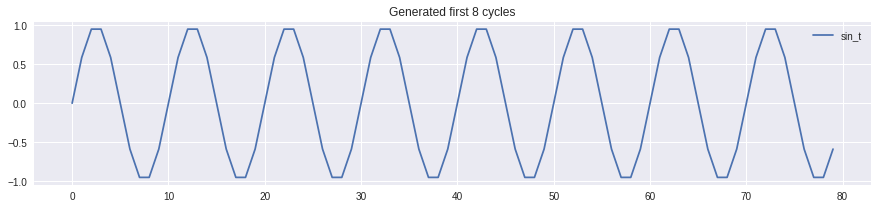

In [4]:
steps_per_cycle = 10

df = noisy_sin(steps_per_cycle=steps_per_cycle,
              random_factor = 0.2)

n_plot = 8
df[["sin_t"]].head(steps_per_cycle * n_plot).plot(
      title="Generated first {} cycles".format(n_plot),
      figsize=(15,3))

### Split Train / Test Data

In [5]:
def _load_data(data, n_prev = 100):  
  """
  data should be pd.DataFrame()
  """

  docX, docY = [], []
  for i in range(len(data)-n_prev):
      docX.append(data.iloc[i:i+n_prev].as_matrix())
      docY.append(data.iloc[i+n_prev].as_matrix())
  alsX = np.array(docX)
  alsY = np.array(docY)

  return alsX, alsY

length_of_sequences = 10
test_size = 0.25

ntr = int(len(df) * (1 - test_size))

df_train = df[["sin_t"]].iloc[:ntr]
df_test  = df[["sin_t"]].iloc[ntr:]
(X_train, y_train) = _load_data(df_train, n_prev = length_of_sequences)
(X_test, y_test)   = _load_data(df_test, n_prev = length_of_sequences)  

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3740, 10, 1) (3740, 1) (1241, 10, 1) (1241, 1)


### Build Model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense


model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(10, 1)))
model.add(Dense(1))
    
model.compile(loss="mean_squared_error", optimizer="rmsprop")
  
## use the default values for batch_size, stateful
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 10,453
Trainable params: 10,453
Non-trainable params: 0
_________________________________________________________________


### Train Model

In [0]:
hist = model.fit(X_train, y_train, batch_size=600, epochs=100, 
                 verbose=False, validation_split=0.05)

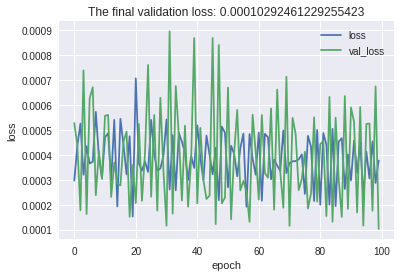

In [9]:
for label in ["loss","val_loss"]:
    plt.plot(hist.history[label],label=label)

plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("The final validation loss: {}".format(hist.history["val_loss"][-1]))
plt.legend()
plt.show()

### Predict Model

In [10]:
y_pred = model.predict(X_test)
plt.figure(figsize=(19,3))

plt.plot(y_test[:100],label="true")
plt.plot(y_pred[:100],label="predicted")
plt.legend()
plt.show()